Filter Batas

Import Library

In [8]:
# Mengimpor library yang diperlukan
# digunakan untuk membuat plot grafik
import matplotlib.pyplot as plt
# digunakan untuk menampilkan plot di dalam notebook
%matplotlib inline

from skimage import data
from skimage.io import imread
from skimage.color import rgb2gray
# digunakan untuk operasi array dan manipulasi data numerik 
import numpy as np
# digunakan untuk pemrosesan gambar dan komputer visi
import cv2

Load & Plot Input Image

Shape citra 1 :  (636, 482)
Shape citra 2 :  (534, 534)


Text(0.5, 1.0, 'Citra 2')

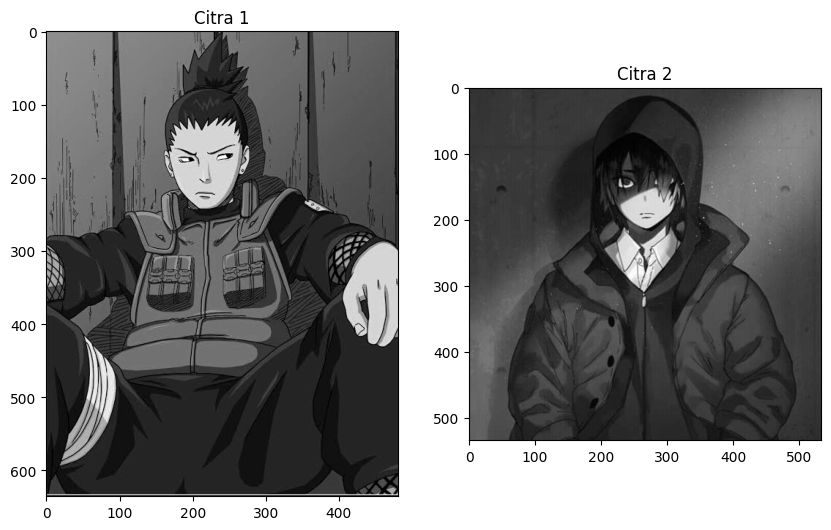

In [9]:
# Membaca citra pertama menggunakan imread
citra1 = imread(fname="Shikamaru.jpeg")

# Membaca citra kedua menggunakan imread
citra2 = imread(fname="Random.jpg")

# Mengubah citra1 dari BGR ke grayscale
citra1 = cv2.cvtColor(citra1, cv2.COLOR_BGR2GRAY)

# Mengubah citra2 dari BGR ke grayscale
citra2 = cv2.cvtColor(citra2, cv2.COLOR_BGR2GRAY)

# Menampilkan dimensi citra pertama
print('Shape citra 1 : ', citra1.shape)

# Menampilkan dimensi citra kedua
print('Shape citra 2 : ', citra2.shape)

# Membuat subplots dengan 1 baris dan 2 kolom, ukuran figure 10x10
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

# Meratakan array objek axis
ax = axes.ravel()

# Menampilkan citra pertama pada axis pertama
ax[0].imshow(citra1, cmap='gray')
ax[0].set_title("Citra 1")

# Menampilkan citra kedua pada axis kedua
ax[1].imshow(citra2, cmap='gray')
ax[1].set_title("Citra 2")

Code Asal Matlab

In [10]:
#for baris=2 : tinggi-1
#    for kolom=2 : lebar-1
#        minPiksel = min([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1) ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);
#        
#        maksPiksel = max([F(baris-1, kolom-1) F(baris-1, kolom) F(baris, kolom+1)    ...
#            F(baris, kolom-1) F(baris, kolom+1) F(baris+1, kolom-1)  ...
#            F(baris+1, kolom) F(baris+1, kolom+1)]);    
#            
#        if F(baris, kolom) < minPiksel
#           G(baris, kolom) = minPiksel;
#        else
#            if F(baris, kolom) > maksPiksel
#                G(baris, kolom) = maksPiksel;
#            else
#                G(baris, kolom) = F(baris, kolom);
#            end
#        end    
#    end
#end

Menyiapkan variable output

In [11]:
# Melakukan copy citra pertama ke dalam copyCitra1 dengan tipe data float
copyCitra1 = citra1.copy().astype(float)

# Melakukan copy citra kedua ke dalam copyCitra2 dengan tipe data float
copyCitra2 = citra2.copy().astype(float)

# Mendapatkan dimensi citra pertama
m1, n1 = copyCitra1.shape[:2]

# Membuat array kosong dengan ukuran yang sama dengan citra pertama
output1 = np.empty((m1, n1))

# Mendapatkan dimensi citra kedua
m2, n2 = copyCitra2.shape[:2]

# Membuat array kosong dengan ukuran yang sama dengan citra kedua
output2 = np.empty((m2, n2))

# Menampilkan shape dari copyCitra1 dan output1
print('Shape copy citra 1 : ', copyCitra1.shape)
print('Shape output citra 1 : ', output1.shape)

# Menampilkan nilai m1 dan n1
print('m1 : ', m1)
print('n1 : ', n1)
print()

# Menampilkan shape dari copyCitra2 dan output2
print('Shape copy citra 2 : ', copyCitra2.shape)
print('Shape output citra 2 : ', output2.shape)

# Menampilkan nilai m2 dan n2
print('m2 : ', m2)
print('n2 : ', n2)
print()


Shape copy citra 1 :  (636, 482)
Shape output citra 1 :  (636, 482)
m1 :  636
n1 :  482

Shape copy citra 2 :  (534, 534)
Shape output citra 2 :  (534, 534)
m2 :  534
n2 :  534



Proses Filter Batas Pada Citra Input 1

In [12]:
# Melakukan loop untuk setiap baris dalam rentang 1 hingga m1-1
for baris in range(1, m1-1):
    # Melakukan loop untuk setiap kolom dalam rentang 1 hingga n1-1
    for kolom in range(1, n1-1):
        
        # Membuat array numpy dari piksel sekitar di citra 1 dan menyimpannya dalam variabel arr
        arr = np.array([copyCitra1[baris-1, kolom-1], copyCitra1[baris-1, kolom], copyCitra1[baris-1, kolom+1],
                        copyCitra1[baris, kolom-1], copyCitra1[baris, kolom], copyCitra1[baris, kolom+1],
                        copyCitra1[baris+1, kolom-1], copyCitra1[baris+1, kolom], copyCitra1[baris+1, kolom+1]])
        
        # Mencari nilai piksel minimum dan maksimum dalam array arr
        minPiksel = np.amin(arr)
        maksPiksel = np.amax(arr)
            
        # Memeriksa apakah nilai piksel pada citra 1 kurang dari piksel minimum
        if copyCitra1[baris, kolom] < minPiksel:
            output1[baris, kolom] = minPiksel
        # Memeriksa apakah nilai piksel pada citra 1 lebih dari piksel maksimum
        elif copyCitra1[baris, kolom] > maksPiksel:
            output1[baris, kolom] = maksPiksel
        # Jika tidak, maka nilai piksel pada citra 1 tetap sama
        else:
            output1[baris, kolom] = copyCitra1[baris, kolom]


Proses Filter Batas Pada Citra Input 2

In [13]:
# Melakukan loop untuk setiap baris dalam rentang 1 hingga m2-1
for baris1 in range(1, m2-1):
    # Melakukan loop untuk setiap kolom dalam rentang 1 hingga n2-1
    for kolom1 in range(1, n2-1):
        
        # Membuat array numpy dari piksel sekitar di citra 2 dan menyimpannya dalam variabel arr
        arr = np.array([copyCitra2[baris1-1, kolom1-1], copyCitra2[baris1-1, kolom1], copyCitra2[baris1-1, kolom1+1],
                        copyCitra2[baris1, kolom1-1], copyCitra2[baris1, kolom1], copyCitra2[baris1, kolom1+1],
                        copyCitra2[baris1+1, kolom1-1], copyCitra2[baris1+1, kolom1], copyCitra2[baris1+1, kolom1+1]])
        
        # Mencari nilai piksel minimum dan maksimum dalam array arr
        minPiksel = np.amin(arr)
        maksPiksel = np.amax(arr)
            
        # Memeriksa apakah nilai piksel pada citra 2 kurang dari piksel minimum
        if copyCitra2[baris1, kolom1] < minPiksel:
            output2[baris1, kolom1] = minPiksel
        # Memeriksa apakah nilai piksel pada citra 2 lebih dari piksel maksimum
        elif copyCitra2[baris1, kolom1] > maksPiksel:
            output2[baris1, kolom1] = maksPiksel
        # Jika tidak, maka nilai piksel pada citra 2 tetap sama
        else:
            output2[baris1, kolom1] = copyCitra2[baris1, kolom1]


Plot Citra Input dan Output Hasil dari Filter Batas

Text(0.5, 1.0, 'Output Citra 2')

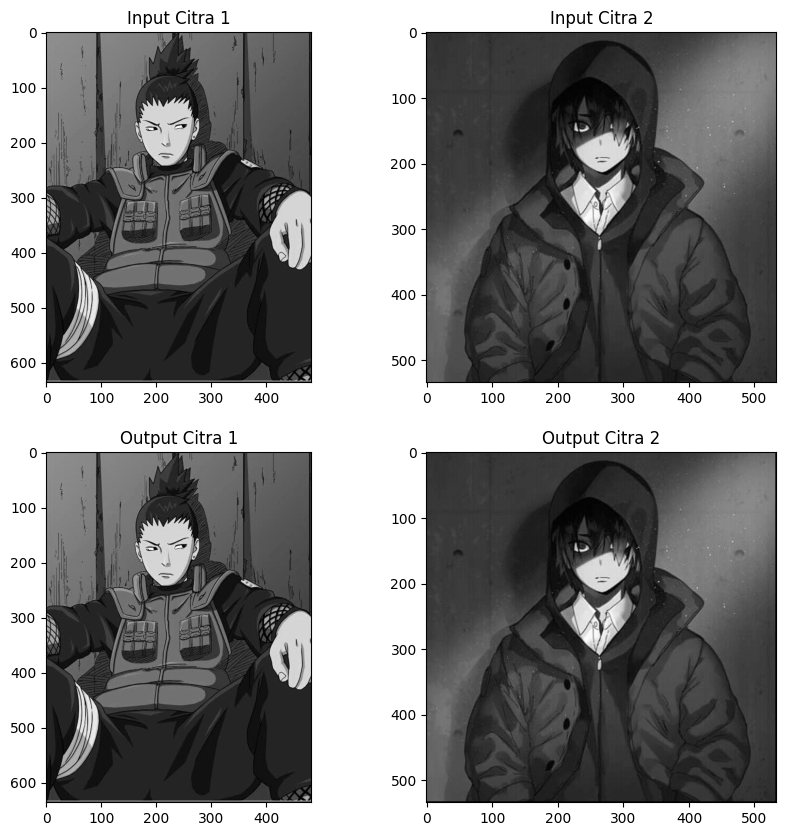

In [14]:
# Membuat figure dan axes dengan ukuran 2x2 dan ukuran total 10x10
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Mengubah array 2D dari axes menjadi array 1D menggunakan ravel()
ax = axes.ravel()

# Menampilkan citra pertama (citra asli) pada axes[0]
ax[0].imshow(citra1, cmap='gray')
ax[0].set_title("Input Citra 1")

# Menampilkan citra kedua (citra asli) pada axes[1]
ax[1].imshow(citra2, cmap='gray')
ax[1].set_title("Input Citra 2")

# Menampilkan output citra pertama setelah pemrosesan pada axes[2]
ax[2].imshow(output1, cmap='gray')
ax[2].set_title("Output Citra 1")

# Menampilkan output citra kedua setelah pemrosesan pada axes[3]
ax[3].imshow(output2, cmap='gray')
ax[3].set_title("Output Citra 2")